In [1]:
import torch
from PIL import Image
import requests
from transformers import Blip2Processor, Blip2Model, Blip2ForConditionalGeneration

D:\Nidhin\lang_chain_local\lchain\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b", cache_dir='blip_cache')
model = Blip2ForConditionalGeneration.from_pretrained(
    "Salesforce/blip2-opt-2.7b", load_in_8bit=True, torch_dtype=torch.float16, cache_dir='blip_cache'
)  # doctest: +IGNORE_RESULT


bin D:\Nidhin\lang_chain_local\lchain\lib\site-packages\bitsandbytes\libbitsandbytes_cuda118.dll


Loading checkpoint shards: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [02:13<00:00, 66.95s/it]


In [4]:
image = Image.open('atlas.png')

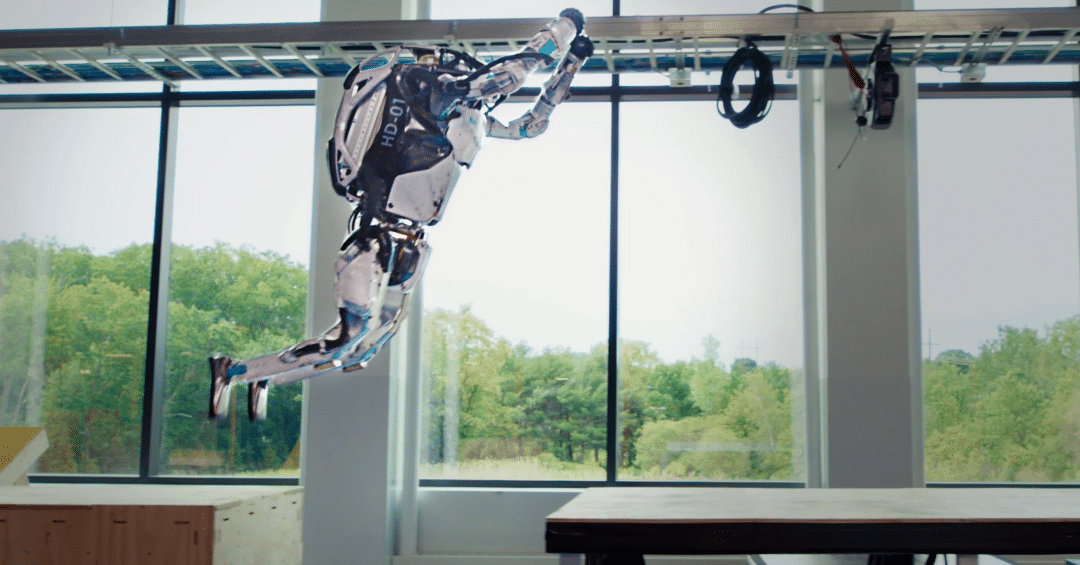

In [5]:
image

In [6]:
inputs = processor(images=image, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

D:\Nidhin\lang_chain_local\lchain\lib\site-packages\transformers\generation\utils.py:1369: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


a robot suspended from the ceiling in a room


In [9]:
prompt = "Question: Is the robot performing any action, if yes what is it? Answer:"
inputs = processor(images=image, text=prompt, return_tensors="pt").to(device="cuda", dtype=torch.float16)

generated_ids = model.generate(**inputs)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

Yes, the robot is performing an action, it is performing a jump
